<a href="https://colab.research.google.com/github/HunterTzou/DATA_110_FALL_2025/blob/main/Tzou_Hunter_Week_7_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Week 7 HW: Palmer's Penguins

## Hunter Tzou

---
<br><br>
##**Task 0:** Explore the Data

Explore the data to see what it looks like and if anything needs to be cleaned.

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

penguins = sns.load_dataset('penguins')

print(penguins.head())

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female  


In [12]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [13]:
penguins.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


We have missing values in `bill_length_mm`,`bill_depth_mm`,`flipper_length_mm`,`body_mass_g`, and `sex`. I will remove them from the dataset since I am planning to use these columns later.

In [14]:
#Remove rows with null values across all the columns

penguins = penguins.dropna()

In [15]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


Looks like we lost about 11 rows. Now, I am going to check to see if all the object columns are clean.

In [16]:
# Show unique values for object columns

print("Unique values in Species:", penguins['species'].unique())
print("Unique values in Island:", penguins['island'].unique())
print("Unique values in Sex:", penguins['sex'].unique())

Unique values in Species: ['Adelie' 'Chinstrap' 'Gentoo']
Unique values in Island: ['Torgersen' 'Biscoe' 'Dream']
Unique values in Sex: ['Male' 'Female']


##Task 1: Create a Scatterplot with Regression Line: `bill length` vs. `flipper length`.

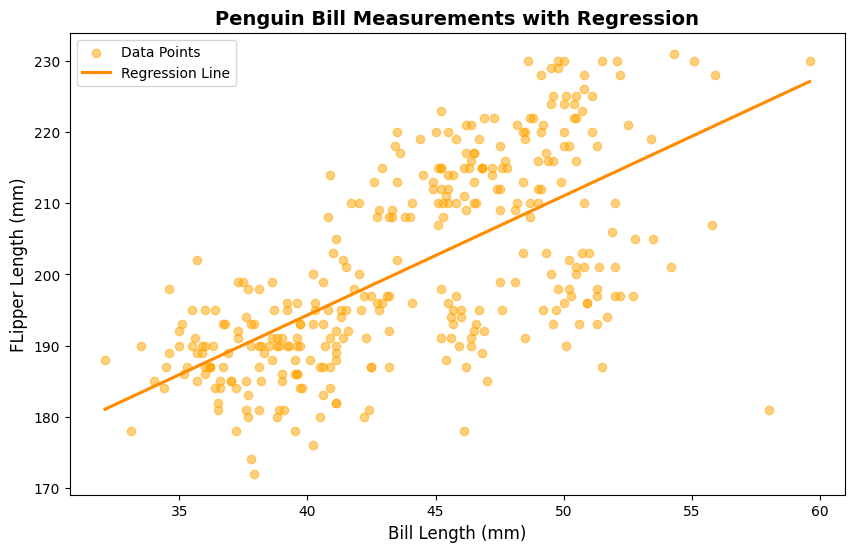

In [23]:
plt.figure(figsize=(10, 6))

plt.scatter(penguins['bill_length_mm'],penguins['flipper_length_mm'], color = "orange", alpha=.5, label="Data Points")

sns.regplot(data=penguins, x="bill_length_mm", y="flipper_length_mm", scatter=False, color="darkorange", ci=None, label="Regression Line")

plt.xlabel("Bill Length (mm)", fontsize=12)
plt.ylabel("Flipper Length (mm)", fontsize=12)
plt.title("Penguin Bill Measurements with Regression", fontsize=14,fontweight = 'bold')

# Add legend
plt.legend()

# Show plot
plt.show()

In [ ]:
##Task 2: Create a Scatterplot with Regression Line: `bill length` vs. `body mass`.

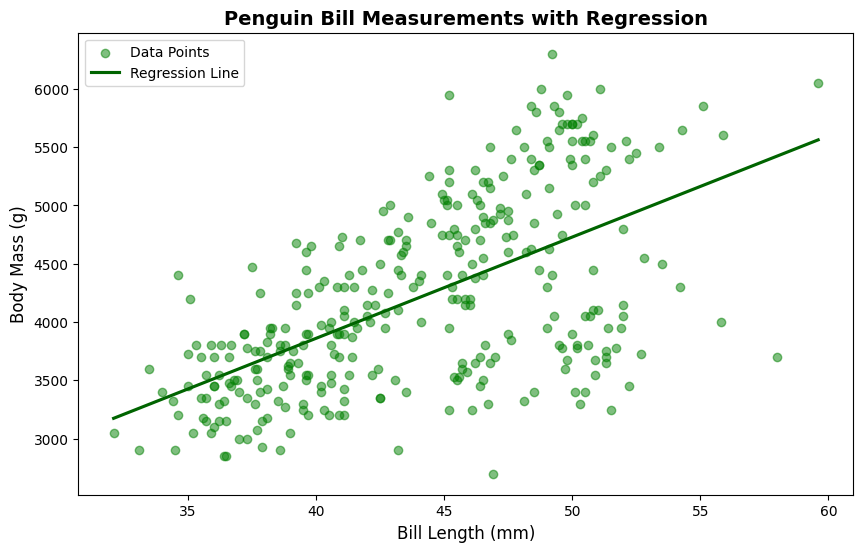

In [24]:
plt.figure(figsize=(10, 6))

plt.scatter(penguins['bill_length_mm'],penguins['body_mass_g'], color = "green", alpha=.5, label="Data Points")

sns.regplot(data=penguins, x="bill_length_mm", y="body_mass_g", scatter=False, color="darkgreen", ci=None, label="Regression Line")

plt.xlabel("Bill Length (mm)", fontsize=12)
plt.ylabel("Body Mass (g)", fontsize=12)
plt.title("Penguin Bill Measurements with Regression", fontsize=14,fontweight = 'bold')

# Add legend
plt.legend()

# Show plot
plt.show()

##Task 3: Create 3 Sub Scatterplots with Regression Lines, Split by Species: `bill length` vs. `body mass`.

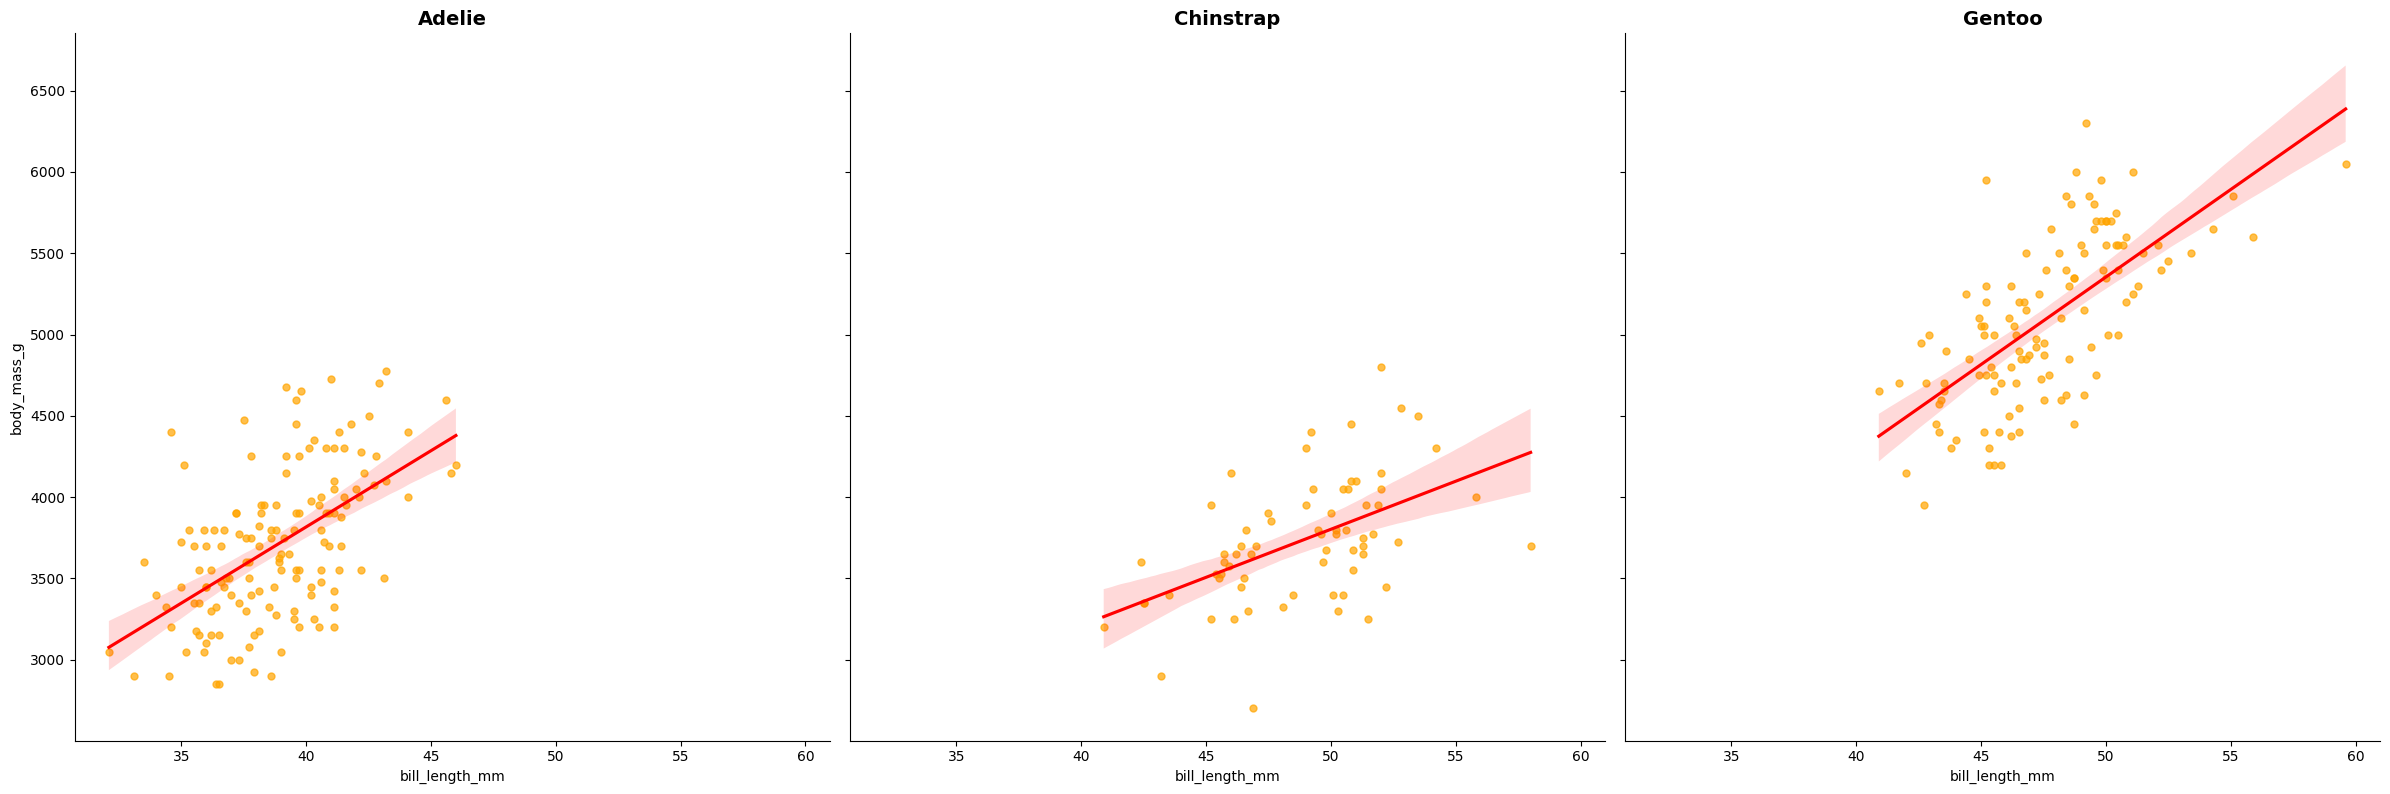

In [40]:
## AI Acknowledgement: I did not know how to make 3 subplots right next to each other or how to make the title bigger for the plots

species_plot = sns.lmplot(
    data=penguins,
    x="bill_length_mm",
    y="body_mass_g",
    col="species",
    height=8,
    scatter_kws={"s": 25, "alpha": 0.7, "color": "orange" },
    line_kws={"color": "red"},
)

species_plot.set_titles(col_template="{col_name}", size=14, weight="bold")

plt.show()

## Task 4: Pairplot Remix

Make a **new pairplot** for the penguins dataset with these settings:
- Use a **different column** for `hue` than before (for example, `island` or `sex`).
- Choose **different markers** such as `["o", "s", "D"]`
- Pick a **different color palette** (for example, `"magma"` or `"coolwarm"`).
- Keep the **diagonal as KDE** (`diag_kind="kde"`).
- Drop missing values for the columns you use.

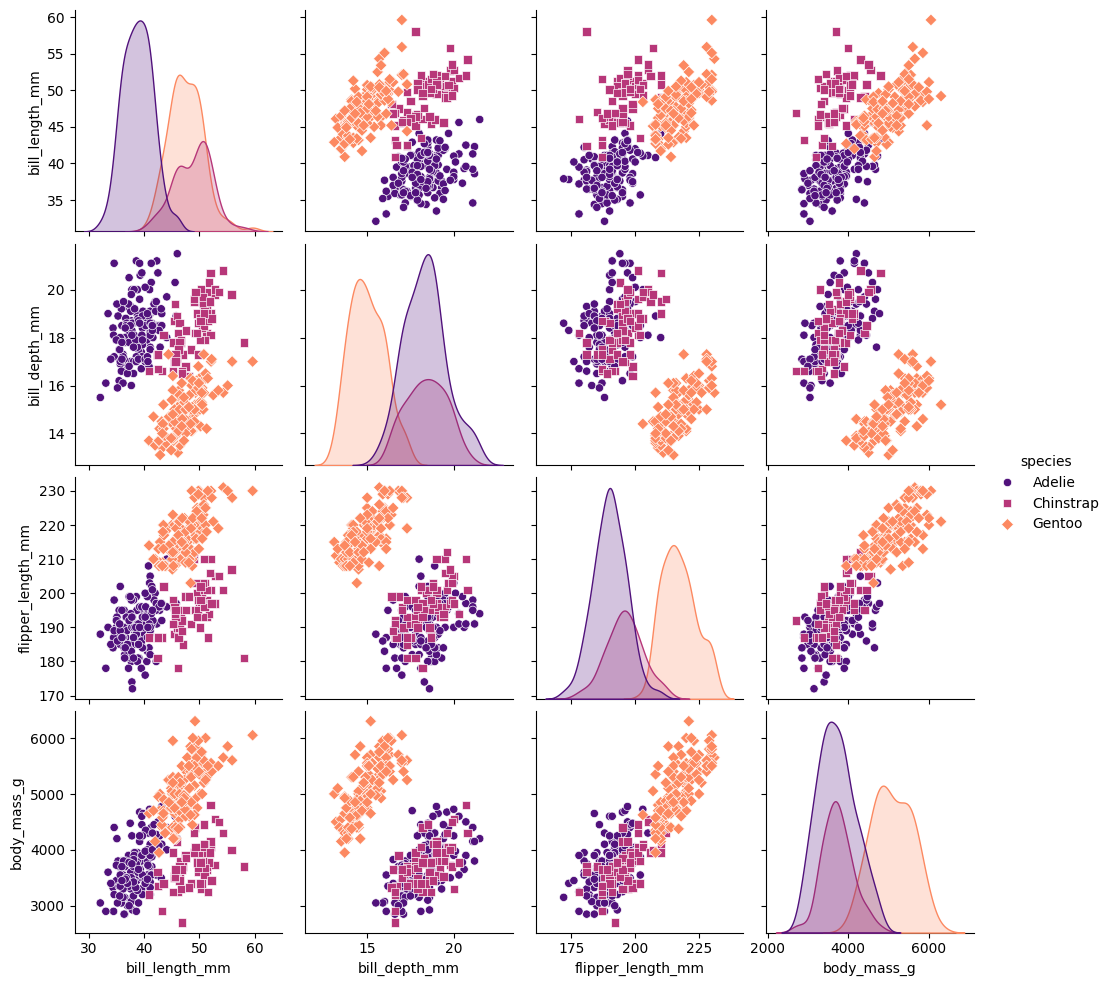

In [52]:
species_pairplot = sns.pairplot(data=penguins, hue='species',palette="magma",markers=["o", "s", "D"],diag_kind="kde")

plt.show()

## Task 5: Create a 2×2 Grid with Mixed Plot Types

Create a **2×2 grid** of subplots using the penguins dataset, including:  
- Top-left: `sns.barplot()` for **body mass by species**  
- Top-right: `sns.scatterplot()` for **bill length vs. bill depth**, colored by species  
- Bottom-left: `sns.histplot()` for **flipper length**, separated by species (`hue="species"`)  
- Bottom-right: `sns.boxplot()` for **body mass by island**  
Add a **title for each subplot**, call **`plt.tight_layout()`**, and produce **one combined figure** (saved as `.png`, ~150 dpi) with appropriate labels/colors.

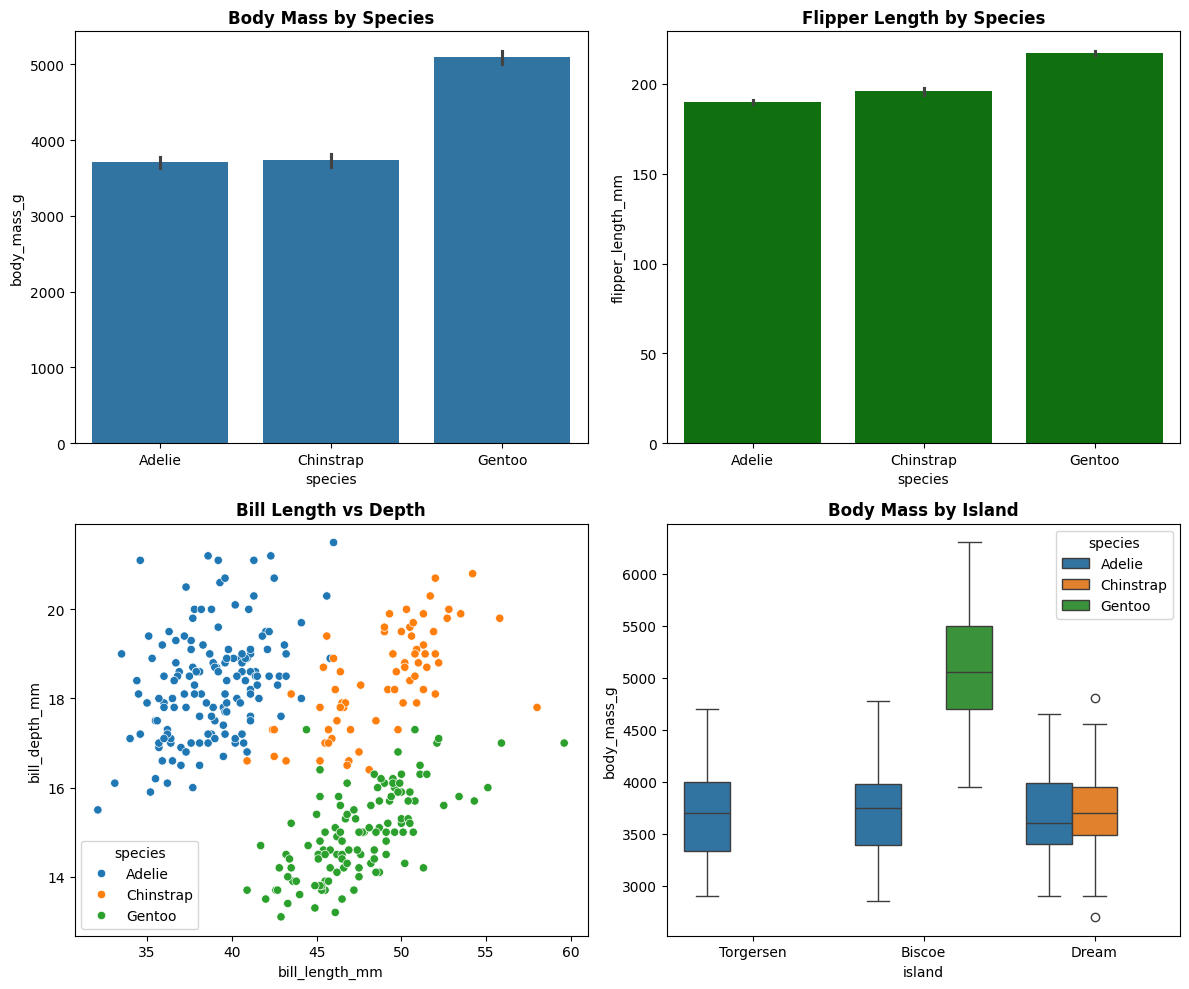

In [65]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

sns.barplot(x='species', y='body_mass_g', data=penguins, ax=axes[0, 0])

sns.barplot(x='species', y='flipper_length_mm', data=penguins,color="green", ax=axes[0, 1])

sns.scatterplot(data=penguins, x='bill_length_mm', y='bill_depth_mm', hue='species', ax=axes[1, 0])

sns.boxplot(data=penguins, x='island', y='body_mass_g', hue='species', ax=axes[1, 1])


axes[0, 0].set_title("Body Mass by Species",fontweight="bold")
axes[0, 1].set_title("Flipper Length by Species",fontweight="bold")
axes[1, 0].set_title("Bill Length vs Depth",fontweight="bold")
axes[1, 1].set_title("Body Mass by Island",fontweight="bold")
plt.tight_layout()
plt.show()


## Task 6

**Pie chart (penguins dataset)** with the following:  
- Count penguins per species  
- Use `plt.pie()` with **labels**, **`autopct='%1.1f%%'`**, **`startangle=90`**, optional **explode**  
- Add a title like **“Distribution of Penguin Species”** and make the chart circular with **`plt.axis('equal')`**.

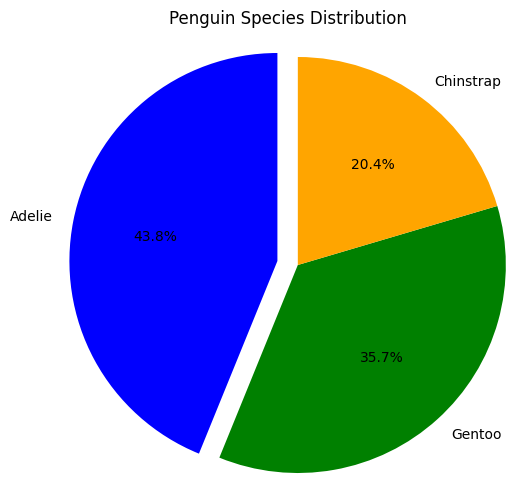

In [73]:
species_counts = penguins['species'].value_counts()

plt.figure(figsize=(6, 6))
explode = (0.1, 0, 0)

plt.pie(
    species_counts,
    labels=species_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['blue', 'green', 'orange'],
    explode=explode
)

plt.title('Penguin Species Distribution')
plt.axis('equal')
plt.show()
